In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = open('three_kind_andMark/G_in/thir_chan.csv', encoding = 'utf-8')
df = pd.read_csv(data, skiprows = 0)
print('data size:', df.shape)
df.head()

data size: (1314, 6)


,ID,X,H-12,P-01,C-01,C-04
0,15-10001,0,121,10.8,14.6,41.8
1,15-10002,0,172,12.5,18.5,45.5
2,15-10003,1,141,11.7,34.2,41.7
3,15-10004,0,105,10.8,14.6,46.5
4,15-10005,1,207,10.1,10.4,41.9


ID：病例编号
X：分类目标
其余特征表示一线标志物

# 数据的直观分布

## 数据构成比例

### 时间与患病数

In [3]:
df['Year'] = df['ID']. apply(lambda row : row.split('-')[0] )
a = df[['Year', 'X', 'ID']].groupby(['Year', 'X']).count()
a

ID
Year X     
15   0  199
     1  210
16   0  228
     1  200
17   0  271
     1  206

In [4]:
plt.style.use('seaborn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF1E25F400>,
      dtype=object)

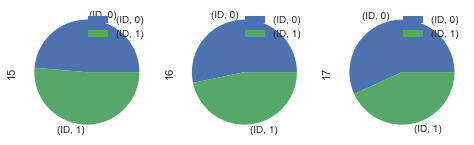

In [5]:
b = a.unstack()
b
(b.T).plot(kind = 'pie', subplots = True)

## 特征的分布规律

D:\ANOCONDA\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF1E3C40B8>,
      dtype=object)

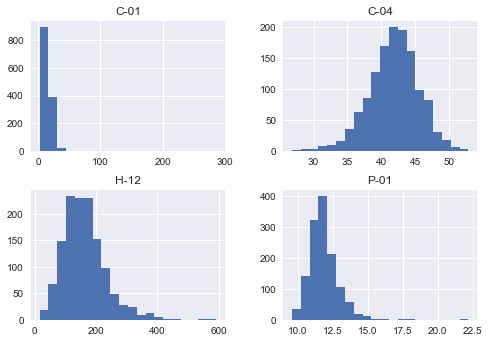

In [6]:
#复制除编号以及病状的所有特征
features = [x for x in df.columns if x not in['ID', 'X'] ]
plt.figure()
ax = plt.subplot(111)
df.hist(column = features, bins = 20, ax = ax)

正相关的特征分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2F3303A20>,
      dtype=object)

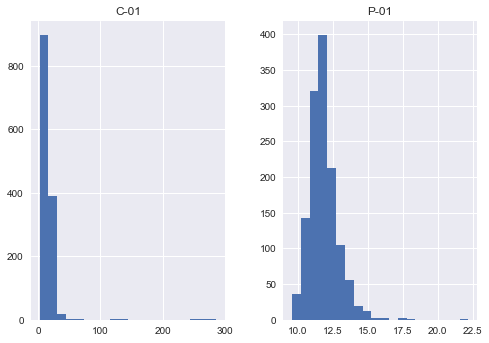

In [7]:
df.hist(column = ['C-01','P-01'], bins = 20)

负相关的特征分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2F33F9BE0>,
      dtype=object)

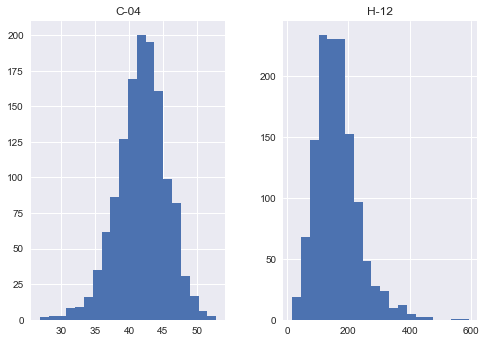

In [8]:
df.hist(column = ['H-12','C-04'], bins = 20)

## 数据的正态化变换



C-01的分布图不符合正态性

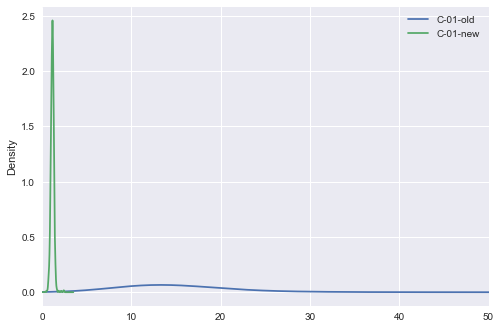

In [10]:
df['C-01'].plot(kind = 'kde', xlim = [0,50], label = 'C-01-old')

np.log10(df['C-01']).plot(kind = 'kde', xlim = [0,50], label = 'C-01-new')
plt.legend()

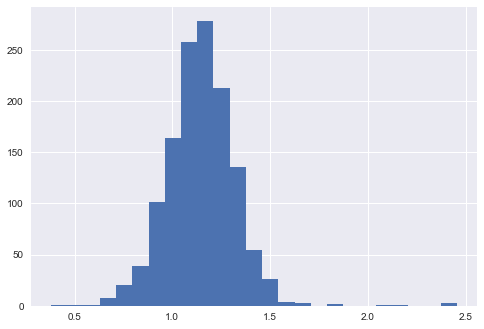

In [11]:
np.log10(df['C-01']).hist(bins = 25)

# 数据的浓缩

五数概括法：  
最小值、最大值、中位数、上四分位数、下四分位数

In [7]:
print('数据的概况总览')
df.describe()

数据的概况总览


,X,H-12,P-01,C-01,C-04
count,1314.000000,1314.000000,1313.000000,1314.000000,1314.000000
mean,0.468798,162.200152,11.841813,15.719863,41.864688
std,0.499215,70.091869,1.047447,14.221567,3.663513
min,0.000000,16.000000,9.600000,2.400000,26.800000
25%,0.000000,115.250000,11.200000,11.000000,39.700000
50%,0.000000,154.000000,11.700000,14.100000,42.100000
75%,1.000000,196.000000,12.300000,18.000000,44.300000
max,1.000000,592.000000,22.200000,285.700000,52.900000


## 样本的矩


1阶原点矩——数学期望、均值  
2阶中心矩——方差  
3阶中心矩——偏度系数  
4阶中心矩——峰度系数

In [8]:
df['C-04'].describe()

count    1314.000000
mean       41.864688
std         3.663513
min        26.800000
25%        39.700000
50%        42.100000
75%        44.300000
max        52.900000
Name: C-04, dtype: float64

In [9]:
print('以特征C-04为例：')
print('均值 = ', df['C-04'].mean())
print('方差 = ', df['C-04'].var())
print('偏度 = ', df['C-04'].skew())
print('峰度 = ', df['C-04'].kurt())

以特征C-04为例：
均值 =  41.86468797564688
方差 =  13.42132636867481
偏度 =  -0.3685360586476185
峰度 =  0.6131902463656678


## 箱型图和异常值

In [4]:
import seaborn as sns

使用seaborn的箱线图展示

同样以C-04为例，看各分类的箱型图：


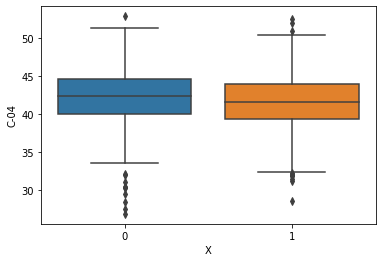

In [5]:
sns.boxplot(x = 'X', y = 'C-04', data = df)
print('同样以C-04为例，看各分类的箱型图：')

异常值分析：  
1) 大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距  
2) 3西格玛原则，数值分布在（μ—3σ,μ+3σ)中的概率为0.9974 

## 数据相关性

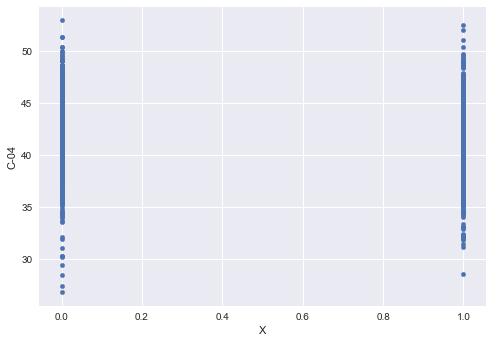

In [10]:
df[['X', 'C-04']].plot(x = 'X', y = 'C-04', kind = 'scatter')


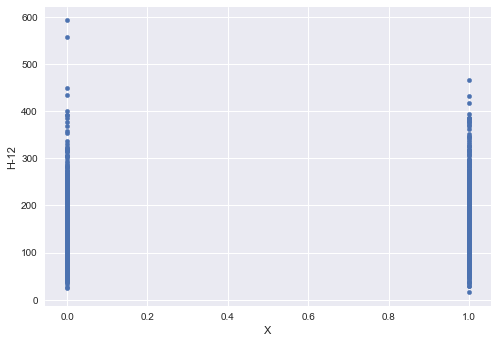

In [11]:
df[['X','H-12']].plot(x = 'X', y = 'H-12', kind = 'scatter')

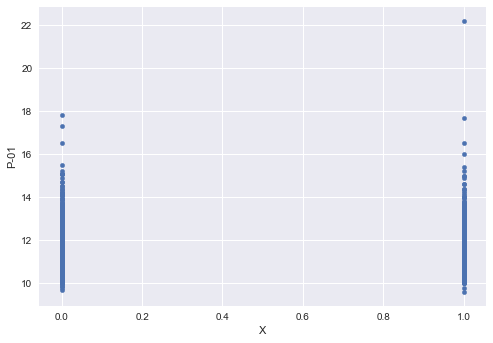

In [12]:
df[['X','P-01']].plot(x = 'X', y = 'P-01', kind = 'scatter')

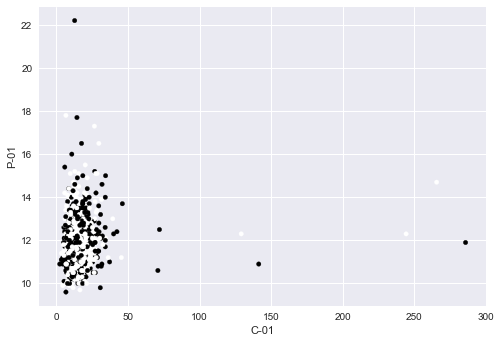

In [13]:
df[['C-01', 'P-01']].plot(x='C-01', y='P-01', c=df['X'], kind='scatter')


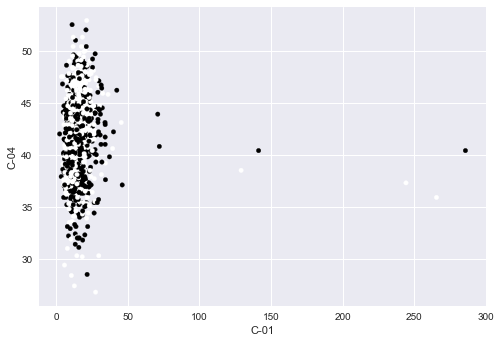

In [14]:
df[['C-01', 'C-04']].plot(x='C-01', y='C-04', c=df['X'], kind='scatter')


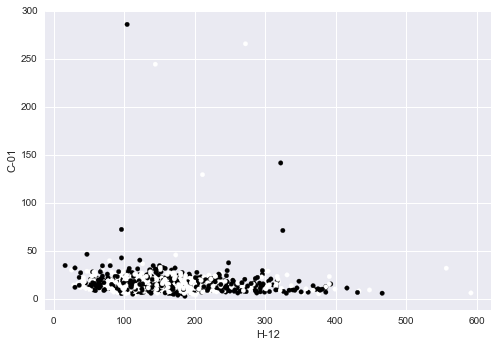

In [15]:
df[['H-12', 'C-01']].plot(x='H-12', y='C-01', c=df['X'], kind='scatter')

## 相关系数矩阵

In [16]:
def process(x):
    if 0<= x <= 38:
        return 0
    elif 38< x < 45:
        return 1
    else:
        return 2
df['C-04-new'] = df['C-04'].apply(lambda x : process(x))
df['C-04-new']

0       1
1       2
2       1
3       2
4       1
5       0
6       2
7       2
8       1
9       1
10      1
11      1
12      1
13      0
14      0
15      0
16      2
17      1
18      1
19      1
20      0
21      2
22      1
23      1
24      0
25      2
26      2
27      1
28      1
29      1
       ..
1284    2
1285    2
1286    2
1287    2
1288    1
1289    2
1290    1
1291    0
1292    1
1293    1
1294    1
1295    2
1296    2
1297    1
1298    0
1299    1
1300    0
1301    1
1302    0
1303    2
1304    1
1305    1
1306    1
1307    2
1308    1
1309    1
1310    0
1311    1
1312    1
1313    1
Name: C-04-new, Length: 1314, dtype: int64

皮尔逊相关系数：
    值域为[-1,1], 1表示完全正相关， -1表示完全负相关，0表示无关， 绝对值越大表明相关性越强

In [7]:
#df[['X','C-04-new']].corr(method = 'spearman')

In [9]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False) #得到性别与其他特征的相关系数  倒序

X       1.000000
C-04    0.102005
H-12    0.072997
P-01    0.021698
C-01    0.003654
Name: X, dtype: float64

# 预处理和降维

## 异常值的处理

### 缺失值处理

In [3]:
print("观察缺失值的比例，以决定采用填补还是丢弃")
df.isnull().describe()

观察缺失值的比例，以决定采用填补还是丢弃


,ID,X,H-12,P-01,C-01,C-04
count,1314,1314,1314,1314,1314,1314
unique,1,1,1,2,1,1
top,False,False,False,False,False,False
freq,1314,1314,1314,1313,1314,1314


这里直接删除包含缺失的样本  
实际应用中可能需要适合的fill none算法  

In [4]:
df.dropna(inplace = True) #数据清洗
print('剩余样本：', df.shape)

剩余样本： (1313, 6)


## 离群点处理

这里直接用3西格玛原则删除了异常的年龄  
实际应用中需要适合的outlier detect算法

3西格玛原则：|采样点与均值的差| > 3倍标准差 --》 则剔除
变形为：
     Xi< X - 3σ or  Xi > X + 3σ

In [5]:
#df.drop(columns = ['Year'], inplace = True)
cols = df.columns
for i in range(2,df.shape[1]):
    up_bound = df[cols[i]].mean() + 3*df[cols[i]].std()
    low_bound = df[cols[i]].mean() - 3*df[cols[i]].std()
    df = df[(df[cols[i]]<=up_bound) & (df[cols[i]]>=low_bound)]
    print("处理特征%s, 剩余样本：%d" % (cols[i],df.shape[0]))

处理特征H-12, 剩余样本：1293
处理特征P-01, 剩余样本：1276
处理特征C-01, 剩余样本：1269
处理特征C-04, 剩余样本：1261


## 数据降维

### 主成分分析

#### to maximize Var(c1X1 + c2X2 + c3X3 + ...) 其中 c1^2 + c2^2 +....+ cp^2 = 1

PCA算法流程：  
1) 0均值化：将X的每一维数据分别减去其平均值，即 X=X-Mean（X）  
2) 协方差矩阵：协方差矩阵C可以描述m维属性之间的相关关系，即 C=(X'X)/m  
3) 数据降维：协方差矩阵C是m*m阶，选取的特征向量矩阵P是m*k阶。通过 Y=XP 即得到投影后的k维样本。

In [25]:
from sklearn.decomposition import PCA
# 直接调包实现了，手写也不复杂
features = [i for i in df.columns if i not in ['ID', 'X', 'Year']]  #feature中去除了 'ID', 'X', 'Year'
X, y = df[features], df['X']
#PCA算法所要保留下来的主成分个数
pca = PCA(n_components=4)
pca.fit(X)
#降维后 各主成分的方差值 
print(pca.explained_variance_ratio_)
#返回各主成分的方差百分比(贡献率)
print(pca.explained_variance_)

[9.88785183e-01 7.97025509e-03 3.07415198e-03 1.70410156e-04]
[3.80447588e+03 3.06665632e+01 1.18281880e+01 6.55674598e-01]


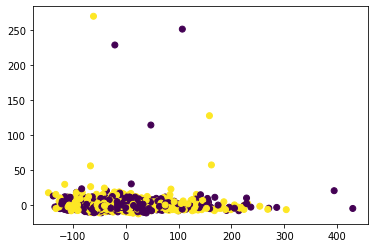

In [13]:
# n_component PCA算法中要保留的成分个数
pca = PCA(n_components=2)
#训练模型  用数据X来训练
pca.fit(X)
#返回降维后的数据
X_new = pca.transform(X)
#画出散点图
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, marker='o')  # y = 0 /1 /2
plt.show()

# 参数检测和方差分析

In [24]:
from scipy.stats.mstats import kruskalwallis
import scipy.stats as stats
import numpy as np
import scipy as sp

#啥叫显著性差异
# p>0.05 表示差异不显著
# 0.01 < p < 0.05 表示差异性显著
# p< 0.01 表示差异性极显著

#三组非正太分布数据检验
def Kruskawallis_test(list1, list2, list3):
    # Perform the Kruskal-Wallis test,返回True表示有显著差异，返回False表示无显著差异
    print("Use kruskawallis test:")
     
    h, p = kruskalwallis(list1, list2, list3)
    print("H value:",h)
    print("p value:",p)
      
    # Print the results
    if p<0.05:
        print('There is a significant difference.')
        return True
    else:
        print('No significant difference.')
        return False

#两组非正态分布数据检验   有关于统计学的知识
def Mannwhitneyu(group1, group2):   
    #以下处理sp版本问题 
    if np.int(sp.__version__.split('.')[1]) > 16:
        u, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        u, p_value = stats.mannwhitneyu(group1, group2, use_continuity=True)
        p_value *= 2    # because the default was a one-sided p-value
    print(("Mann-Whitney test", p_value))
    if p_value<0.05:
        print("there is significant difference")
    else:
        print("there is no significant difference")

## 单因素方差分析

In [14]:
"""
#检验C-04和患病是否有关
list_1 = df[df['C-04'] == 1]['X'].tolist()
list_2 = df[df['C-04'] == 2]['X'].tolist()

#独立T检验
print(stats.ttest_ind(list_1, list_2))

#Mannwhitneyu 检验
print(Mannwhitneyu(list_1, list_2))
"""

Ttest_indResult(statistic=-8.119339385238147, pvalue=1.1398953086689947e-15)
('Mann-Whitney test', 3.3458328186518683e-15)
there is significant difference
None


结果说明，T-06和患病与否有显著性相关

## 多因素方差分析

连续型的属性，需要采样后进行多因子的方差分析  
例如C-04，可以分成多段bins与其他因素结合 

In [25]:
"""
def process(x):
    if 0<= x <=30:
        return 0
    elif 30< x< 60:
        return 1
    else:
        return 2
"""
df.drop(columns = ['C-04-new'], inplace = True)
df['C-04-new'] = df['C-04'].apply(lambda x : process(x))
df['C-04-new'].head()

0    1
1    2
2    1
3    2
4    1
Name: C-04-new, dtype: int64

In [26]:
list_C04_0 = df[df['C-04-new']==0]['X'].tolist()
list_C04_1 = df[df['C-04-new']==1]['X'].tolist()
list_C04_2 = df[df['C-04-new']==2]['X'].tolist()
list_group = [list_C04_0, list_C04_1, list_C04_2]

#Kruskawallis_test  三组非正太分布数据检验
Kruskawallis_test(list_C04_0, list_C04_1, list_C04_2)

Use kruskawallis test:
H value: 19.482685558603876
p value: 5.8801524336714145e-05
There is a significant difference.


True

结果说明，T-05和患病与否具有显著相关

# 完整的处理流程

## 数据分析

## 数据清洗

### 删除缺失> 15%的列

In [6]:
isnull_df = df.isnull().describe()
isnull_df

,ID,X,H-12,P-01,C-01,C-04
count,1261,1261,1261,1261,1261,1261
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1261,1261,1261,1261,1261,1261


In [7]:
isnull_df.loc[:, isnull_df.loc['freq'] < isnull_df.loc['count']*0.85]

""
count
unique
top
freq


In [8]:
#删除缺失值比例大于0.85的列
#df.drop(columns = [ ''] ,inplace = True)
#df.head()

### 删除相关性<0.01的列

In [9]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False)

X       1.000000
C-04    0.129506
H-12    0.081555
P-01    0.029954
C-01    0.020220
Name: X, dtype: float64

In [10]:
corr = corr_mat['X'].abs()
print(corr[corr < 0.01].index)

Index([], dtype='object')


In [11]:
df.drop(columns = [] , inplace = True)
df.head()

,ID,X,H-12,P-01,C-01,C-04
0,15-10001,0,121,10.8,14.6,41.8
1,15-10002,0,172,12.5,18.5,45.5
2,15-10003,1,141,11.7,34.2,41.7
3,15-10004,0,105,10.8,14.6,46.5
4,15-10005,1,207,10.1,10.4,41.9


## 数据预处理

### 删除6sigma离群点

In [12]:
print('原始样本', df.shape)
des_df = df.describe()
des_df

原始样本 (1261, 6)


,X,H-12,P-01,C-01,C-04
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,0.467883,158.589215,11.770500,14.887470,42.016416
std,0.499165,61.670986,0.886711,5.605808,3.479150
min,0.000000,25.000000,9.600000,2.400000,31.400000
25%,0.000000,116.000000,11.200000,11.100000,39.800000
50%,0.000000,153.000000,11.700000,14.100000,42.200000
75%,1.000000,194.000000,12.300000,17.800000,44.300000
max,1.000000,371.000000,14.900000,46.100000,52.500000


离群点大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距 箱线图中上限和下限

In [13]:
des_df.loc['25%', 'C-04']

39.8

In [14]:
#删除离群点  改为正常值

#得到目前为止 经过清洗后的数据的特征名 除 ‘ID’ 'X':病情
features = [x for x in df.columns if x not in['ID', 'X']] 
#提取出除X外 与x相关系数大于0.1的索引
importances = [x for x in corr[corr>0.1].index.tolist() if x != 'X']
for x in features:
#     upper_bound = des_df.loc['75%', x] + 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
#     lower_bound = des_df.loc['25%', x] - 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
    upper_bound = des_df.loc['mean', x] + 6*des_df.loc['std', x]
    lower_bound = des_df.loc['mean', x] - 6*des_df.loc['std', x]
    if x in importances:
        df = df[(df[x]<=upper_bound) & (df[x]>=lower_bound)]
    else:
        df.loc[df[x]>upper_bound, x] = upper_bound
        df.loc[df[x]<lower_bound, x] = lower_bound
print("剩余样本：", df.shape)

剩余样本： (1261, 6)


In [15]:
df.isnull().describe()

,ID,X,H-12,P-01,C-01,C-04
count,1261,1261,1261,1261,1261,1261
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1261,1261,1261,1261,1261,1261


### 分段mean 补全缺失值

In [16]:
df[['X', 'ID']].groupby('X').count()

,ID
X,
0,671
1,590


In [17]:
# 分段 按x=0， 1， 2不同情况 把每列进行均值填充
print(df['X'].unique().tolist())
for x in df['X'].unique().tolist():
    #复制所有df['X'] = 当前遍历值 的行
    tmp = df[df['X']==x].copy(deep=False)
   #tmp.fillna(tmp.mean(axis=0, skipna=True), inplace=True)
    #print(tmp.mean())
    #以'X' 为分组， NAN均以每列的平均值填充 
    df.loc[df['X']==x] = df[df['X']==x].fillna(tmp.mean()) 
df.isnull().describe()

[0, 1]


,ID,X,H-12,P-01,C-01,C-04
count,1261,1261,1261,1261,1261,1261
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1261,1261,1261,1261,1261,1261


### 数据标准化

In [18]:
for x in features:
    delta = 0.000001
    df[x] = (df[x] - df[x].mean()) / (df[x].std() + delta)
df.describe()

,X,H-12,P-01,C-01,C-04
count,1261.000000,1.261000e+03,1.261000e+03,1.261000e+03,1.261000e+03
mean,0.467883,-1.267820e-16,-9.015610e-16,2.380684e-16,-1.510115e-15
std,0.499165,1.000000e+00,9.999989e-01,9.999998e-01,9.999997e-01
min,0.000000,-2.166160e+00,-2.447807e+00,-2.227595e+00,-3.051439e+00
25%,0.000000,-6.905875e-01,-6.433879e-01,-6.756332e-01,-6.370564e-01
50%,0.000000,-9.062957e-02,-7.950679e-02,-1.404740e-01,5.276703e-02
75%,1.000000,5.741887e-01,5.971505e-01,5.195557e-01,6.563626e-01
max,1.000000,3.444258e+00,3.529332e+00,5.567891e+00,3.013259e+00


计算协方差

In [35]:
#df.drop(columns = ['C-04-new'], inplace = True)
cov_mat = df.cov()
cov_mat['X'].abs().sort_values(ascending = False)

X       0.249166
C-04    0.064645
H-12    0.040710
P-01    0.014952
C-01    0.010093
Name: X, dtype: float64

In [36]:
cov = cov_mat['X']
print('正向：', cov[cov > 0].index.tolist())
print('负向: ', cov[cov < 0].index.tolist())

正向： ['X', 'H-12', 'P-01', 'C-01']
负向:  ['C-04']


### 保存cleaned数据

In [40]:
df.to_csv('thir_non_Cleaned.csv', index = False, header = True, encoding = 'utf-8')

In [41]:
df.head()

,ID,X,H-12,P-01,C-01,C-04
0,15-10001,0,-0.609512,-1.094493,-0.051281,-0.062204
1,15-10002,0,0.217457,0.822703,0.644426,1.001274
2,15-10003,1,-0.285211,-0.079507,3.445092,-0.090946
3,15-10004,0,-0.868953,-1.094493,-0.051281,1.288701
4,15-10005,1,0.784985,-1.883926,-0.800504,-0.033461


## 数据建模

### 训练逻辑回归LR模型

In [22]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [23]:
#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
#构建并训练模型
##  multi_class:分类方式选择参数，有"ovr(默认)"和"multinomial"两个值可选择，在二元逻辑回归中无区别
##  cv:几折交叉验证
##  solver:优化算法选择参数，当penalty为"l1"时，参数只能是"liblinear(坐标轴下降法)"
##  "lbfgs"和"cg"都是关于目标函数的二阶泰勒展开
##  当penalty为"l2"时，参数可以是"lbfgs(拟牛顿法)","newton_cg(牛顿法变种)","seg(minibactch随机平均梯度下降)"
##  维度<10000时，选择"lbfgs"法，维度>10000时，选择"cs"法比较好，显卡计算的时候，lbfgs"和"cs"都比"seg"快
##  penalty:正则化选择参数，用于解决过拟合，可选"l1","l2"
##  tol:当目标函数下降到该值是就停止，叫：容忍度，防止计算的过多
lr = LogisticRegressionCV(
    multi_class="multinomial",
    fit_intercept=True,
    Cs=np.logspace(-2,2,20),
    cv=2,
    penalty="l2",
    solver="lbfgs",
    tol=0.01,
    max_iter = 1000,
    class_weight='balanced',
    
)
re = lr.fit(X_train,Y_train)


In [25]:
#模型效果获取
r = re.score(X_train,Y_train)
print("R值(准确率):",r)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test))     #sigmoid函数转化的值，即：概率p

R值(准确率): 0.5625
参数: [[ 0.09990179 -0.00633198  0.06243935 -0.1346399 ]]
截距: [-0.00373646]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.37967411 0.62032589]
 [0.51264211 0.48735789]
 [0.46412628 0.53587372]
 [0.61544664 0.38455336]
 [0.57551161 0.42448839]
 [0.51036354 0.48963646]
 [0.53339619 0.46660381]
 [0.41666032 0.58333968]
 [0.54801857 0.45198143]
 [0.54719921 0.45280079]
 [0.54173304 0.45826696]
 [0.43586285 0.56413715]
 [0.38959037 0.61040963]
 [0.57254783 0.42745217]
 [0.48055822 0.51944178]
 [0.49123239 0.50876761]
 [0.53060011 0.46939989]
 [0.47791239 0.52208761]
 [0.57354651 0.42645349]
 [0.47942825 0.52057175]
 [0.57891493 0.42108507]
 [0.60423441 0.39576559]
 [0.53088668 0.46911332]
 [0.59914373 0.40085627]
 [0.61518649 0.38481351]
 [0.51990068 0.48009932]
 [0.45591636 0.54408364]
 [0.49625807 0.50374193]
 [0.50747074 0.49252926]
 [0.60020852 0.39979148]
 [0.53418647 0.46581353]
 [0.42063127 0.57936873]
 [0.51115623 0.48884377]
 [0.45260785 0.54739215]
 [0.4745

### 模型的持久化

In [47]:
#模型的保存与持久化
from sklearn.externals import joblib
# joblib.dump(ss,"logistic_ss.model")     #将标准化模型保存
joblib.dump(lr,"thir_chan_logistic_lr.model")     #将训练后的线性模型保存
# joblib.load("logistic_ss.model")        #加载模型,会保存该model文件
joblib.load("thir_chan_logistic_lr.model")

LogisticRegressionCV(Cs=array([1.00000e-02, 1.62378e-02, 2.63665e-02, 4.28133e-02, 6.95193e-02,
       1.12884e-01, 1.83298e-01, 2.97635e-01, 4.83293e-01, 7.84760e-01,
       1.27427e+00, 2.06914e+00, 3.35982e+00, 5.45559e+00, 8.85867e+00,
       1.43845e+01, 2.33572e+01, 3.79269e+01, 6.15848e+01, 1.00000e+02]),
           class_weight='balanced', cv=2, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='multinomial',
           n_jobs=None, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

### 预测结果评价

In [26]:
import matplotlib as mpl

#解决matplotlib 中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


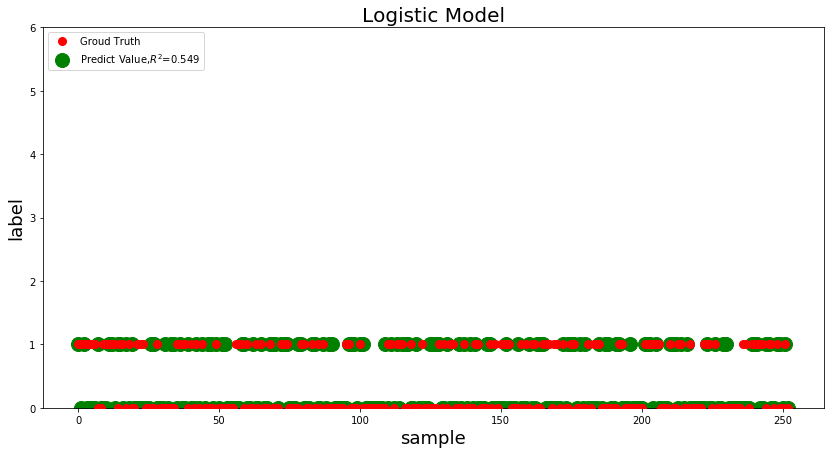

=============Y_test==============
[1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0]
============Y_predict============
[1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 

In [27]:
#预测
Y_predict = lr.predict(X_test)
 
#画图对预测值和实际值进行比较
x = range(len(X_test))
plt.figure(figsize=(14,7),facecolor="w")
plt.ylim(0,6)
plt.plot(x,Y_test,"ro",markersize=8,zorder=3,label=u"Groud Truth")
plt.plot(x,Y_predict,"go",markersize=14,zorder=2,label=u"Predict Value,$R^2$=%.3f" %lr.score(X_test,Y_test))
plt.legend(loc="upper left")
plt.xlabel(u"sample",fontsize=18)
plt.ylabel(u"label",fontsize=18)
plt.title(u"Logistic Model",fontsize=20)
plt.show()
 
print("=============Y_test==============")
print(Y_test.ravel())
print("============Y_predict============")
print(Y_predict)

In [28]:
from sklearn import metrics

print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))

预测准确率： 0.549407114624506
精度： 0.5462752386246229
召回率： 0.549407114624506


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [30]:

#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn import tree
from matplotlib import pyplot as plt




#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

bestTestingScore = 0.0
bestDepth = 0
bestriterion = ''

maxdepth = 40
depths = np.arange(2, maxdepth)
criterions = ['gini','entropy']
for criterion in criterions:
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = tree.DecisionTreeClassifier(criterion = criterion ,max_depth = depth)
        clf.fit(X_train, Y_train)
        trSc = clf.score(X_train, Y_train)
        teSc = clf.score(X_test, Y_test)
        training_scores.append(trSc)
        testing_scores.append(teSc)
        if bestTestingScore< teSc:
            bestTestingScore = teSc
            bestDepth = depth
            bestriterion = criterion
print('best score %.2f' % bestTestingScore)
print('depth %d' % bestDepth)
print('criterion %s' % bestriterion)


best score 0.62
depth 16
criterion entropy


In [31]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.svm import SVC


target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


svm_clf = Pipeline((
                    ('scaler', StandardScaler()),
                   ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
                  )).fit(X_train, Y_train)
print('linear_svc training score:%f' % svm_clf.score(X_train, Y_train))
print('linear_svc testing score:%f' % svm_clf.score(X_test, Y_test))


rbf_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 5 )) #当C为0.001 时 预测非1
                               )).fit(X_train, Y_train)
print('rbf_kernel_svc training score:%f' % rbf_kernel_svm_clf.score(X_train, Y_train))
print('rbf_kernel_svc testing score:%f' % rbf_kernel_svm_clf.score(X_test, Y_test))

linear_svc training score:0.581349
linear_svc testing score:0.584980
rbf_kernel_svc training score:0.983135
rbf_kernel_svc testing score:0.608696


/Users/xiangsong/Library/Python/3.6/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## CCA 特征

In [ ]:
## CCA 数据 没有
"""
CCA_FILES = ["CCA.csv", "DMPCCA.csv", "LDCCA.csv", "LPCCA.csv", "rank-CCA.csv", "semi-CCA.csv"]

for fi in CCA_FILES:
    df = pd.read_csv(open(fi, encoding='utf-8'), skiprows=0)  
    #划分训练集与测试集
    target = 't'
    features = [x for x in df.columns if x not in['t']]
    X, Y = df[features], df[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    lr = LogisticRegressionCV(
        multi_class="multinomial",
        fit_intercept=True,
        Cs=np.logspace(-2,2,20),
        cv=2,
        penalty="l2",
        solver="lbfgs",
        tol=0.01,
        max_iter = 1000,
        class_weight='balanced', 
    )
    re = lr.fit(X_train,Y_train)
    Y_predict = lr.predict(X_test)
    print("===== %s =====" % fi)
    print("训练准确率：", re.score(X_train,Y_train))
    print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
    print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
    print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))
    print("==========")
"""